In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
%matplotlib inline
import seaborn as sns

In [2]:
date = '2020-01-12'
path = '../data/{}.csv'.format(date)

In [3]:
df = pd.read_csv(path)
df.time = pd.to_datetime(df.time)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694393 entries, 0 to 694392
Data columns (total 4 columns):
id_module    694393 non-null int64
id_status    694393 non-null int64
value        694393 non-null object
time         694393 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 21.2+ MB


### Lista parametrow.

In [10]:
parameters = {'TC_FAN_STATE': 1006,
              'TC_COMPRESSOR_STATE': 1007,
              'TC_EVI_STATE': 1008,
              'TC_REVERSING_VALVE_STATE': 1009,
              'TC_DRIP_TRAY_DEFROST_STATE': 1010,
              'TC_DHW_HEATER_STATE': 1011,
              'TC_UPPER_SOURCE_PUMP_STATE': 1014,
              'TC_HEATING_VALVE_STATE': 1015,
              'TC_COMPRESSOR_BACKUP_HEATER_STATE': 1016,
              'TC_DHW_TEMP': 1020,
              'TC_OUTSIDE_TEMP': 1021,
              'TC_COMPRESSED_GAS_TEMP': 1022,
              'TC_BUFFER_TEMP_UPPER': 1023,
              'TC_BUFFER_TEMP_LOWER': 1024,
              'TC_CONDENSER_TEMP': 1025,
              'TC_EVAPORATOR_TEMP': 1026,
              'TC_UPPER_SOURCE_RETURN_TEMP': 1027,
              'TC_UPPER_SOURCE_IN_TEMP': 1028,
              'TC_COMPRESSOR_OIL_TEMP': 1029,
              'TC_CURRENT_FLOW': 1107,
              'TC_CURRENT_BUFFER_SETPOINT': 1624,
              'TC_UPPER_SOURCE_DELTA': 1648,
              'TC_EVD_PROBE_S1_READING': 1657,
              'TC_EVD_PROBE_S2_READING': 1658,
              'TC_EVD_PROBE_S3_READING': 1659,
              'TC_EVD_PROBE_S4_READING': 1660,
              'TC_EVD_SUCTION_TEMPERATURE': 1661,
              'TC_EVD_EVAPORATION_TEMPERATURE': 1662,
              'TC_EVD_EVAPORATION_PRESSURE': 1663,
              'TC_EVD_SUPER_HEAT': 1666,
              'TC_EVD_CONDENSING_PRESSURE': 1668,
              'TC_EVD_CONDENSING_TEMPERATURE': 1669,
              'TC_EVD_VALVE_OPENING': 1674,
              'TC_CURRENT_POWER_CONSUMPTION': 1701,
              'TC_CURRENT_ENERGY_OUTPUT': 1715,
              'TC_CURRENT_COP': 1734,
              'TC_HEATER_CURRENT_MINUTE_DEGREE': 1813,
              'TC_MINUTES_SINCE_LAST_DEFROST': 1814,
              'TC_COMPRESSOR_LAST_WORK_TIME': 1816,
              'TC_COMPRESSOR_LAST_STOP_TIME': 1818,
              'TC_EXTRA_INPUT_STATE_1': 1868,
              'TC_EXTRA_INPUT_STATE_2': 1869}

parameters_value = parameters.values()
parameters_value

dict_values([1006, 1007, 1008, 1009, 1010, 1011, 1014, 1015, 1016, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1107, 1624, 1648, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1666, 1668, 1669, 1674, 1701, 1715, 1734, 1813, 1814, 1816, 1818, 1868, 1869])

### Lista modułów.

In [11]:
modules = df.id_module.unique()
modules

array([20752, 21834, 23082,  5599, 10865, 16031])

### Dane.

In [12]:
def get_value(val):
    arr_val = val.split(',')
    type = int(arr_val[2])
    if type == 1:
        return int(arr_val[6])
    elif type == 6:
        return int(arr_val[11])
    elif type == 11:
        return int(arr_val[4])
    else:
        print('Error: Id: {} Type {} unsupport!'.format(arr_val[0], type))
        return np.nan

In [13]:
data = df.copy()
data = data[data.id_status.isin(parameters_value)]
data = data.sort_values('time')
data['val'] = data['value'].apply(get_value)
data = data.drop('value', axis=1)
data.time = data.time.apply(lambda x: x.time().replace(second=0, microsecond=0))

In [14]:
def prepare_data_for_module(id_module, data, parameters):
    data = data[data.id_module == id_module]
    columns = list(parameters.keys())
    columns.append('TIME')
    module_data = pd.DataFrame(columns=columns)
    time = data.time.unique()
    module_data['TIME'] = time
    for k in parameters:
        module_time = data[data.id_status == parameters[k]]['time'].values
        if module_time.shape[0] > 0:
            dif_time = np.setdiff1d(time, module_time)
            calc_index = []
            for dif in dif_time:
                calc_index.append(np.where(time == dif)[0][0])
            d = data[data.id_status == parameters[k]]['val'].values
            for i in calc_index:
                print("Convert to float, NaN")
                d = d.astype(float)
                d = np.insert(d, i, np.nan)
            module_data[k] = d
        else:
            print("Error: Not fount parameter: {}".format(k))
    return module_data

In [15]:
# fix dla modulu 23082

data_module = prepare_data_for_module(23082, data, parameters)
data_module['WORK_TIMER'] = data_module.TC_COMPRESSOR_STATE * data_module.TC_COMPRESSOR_LAST_WORK_TIME

Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to float, NaN
Convert to

In [16]:
data_module.head()

,TC_FAN_STATE,TC_COMPRESSOR_STATE,TC_EVI_STATE,TC_REVERSING_VALVE_STATE,TC_DRIP_TRAY_DEFROST_STATE,TC_DHW_HEATER_STATE,TC_UPPER_SOURCE_PUMP_STATE,TC_HEATING_VALVE_STATE,TC_COMPRESSOR_BACKUP_HEATER_STATE,TC_DHW_TEMP,...,TC_CURRENT_ENERGY_OUTPUT,TC_CURRENT_COP,TC_HEATER_CURRENT_MINUTE_DEGREE,TC_MINUTES_SINCE_LAST_DEFROST,TC_COMPRESSOR_LAST_WORK_TIME,TC_COMPRESSOR_LAST_STOP_TIME,TC_EXTRA_INPUT_STATE_1,TC_EXTRA_INPUT_STATE_2,TIME,WORK_TIMER
0,90,1,0.0,0.0,0.0,0.0,100.0,0.0,0.0,606.0,...,15,23,0.0,0.0,30.0,16087.0,1.0,0.0,00:00:00,30.0
1,90,1,0.0,0.0,0.0,0.0,100.0,0.0,0.0,603.0,...,100,15,0.0,0.0,30.0,16087.0,1.0,0.0,00:01:00,30.0
2,90,1,0.0,0.0,0.0,0.0,100.0,0.0,0.0,605.0,...,134,34,0.0,0.0,150.0,16087.0,1.0,0.0,00:02:00,150.0
3,90,1,0.0,0.0,0.0,0.0,90.0,0.0,0.0,603.0,...,100,25,0.0,0.0,180.0,16087.0,1.0,0.0,00:03:00,180.0
4,90,1,0.0,0.0,0.0,0.0,90.0,0.0,0.0,606.0,...,100,23,0.0,0.0,240.0,16087.0,1.0,0.0,00:04:00,240.0


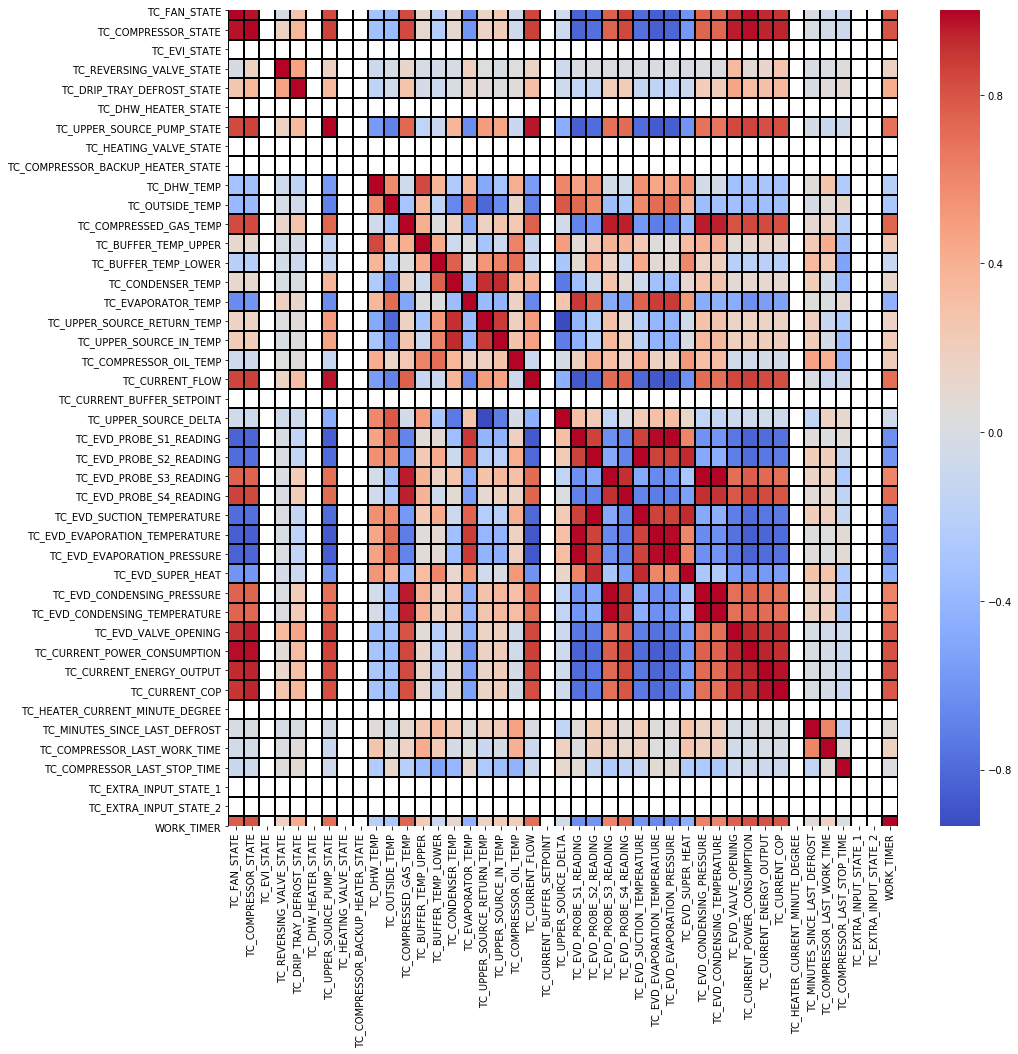

In [29]:
columns = list(parameters.keys())
columns.append('WORK_TIMER')
corr = data_module[columns].corr()
# corr.style.background_gradient(cmap='coolwarm')
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap= 'coolwarm', linewidths=1, linecolor='black')

In [ ]:
time_list = pd.to_timedelta(np.arange(24*60), unit='m')
time_list